This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.90335006]
 [-0.34139398]
 [-0.90786165]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.32162142]
 [0.49976766]
 [0.9690558 ]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

**Creating a TensorFlow variable**

to train a model, we'll need to update its state.
That's where variables come in.

tf.Variable is the class meant to manage modifiable state in Tensorflow

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.06566095],
       [0.69371146],
       [2.402582  ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
print(b) #각 원소 제곱
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var) #y = x **2
gradient = tape.gradient(result, input_var)    # dy/dx

#retrieve the gradients of the loss of a model with respect to weights
#gradients = tape.gradient(loss, weights)

**Using `GradientTape` with constant tensor inputs**

ontly trainable variables are tracked by default.

with a constant tensor, you'd have to manually mark it as being tracked by calling tape

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape: #context 안에서 계산된 모든 연산들을 tape에 저장.
   tape.watch(input_const) #tf.Tensor에 대한 그래디언트를 기록하려면 GradientTape.watch(x)를 호출해야 합니다.
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], #2 dimensional
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

print(negative_samples)
print(positive_samples)

[[-0.11694568  1.59512506]
 [ 3.22140829  3.40230726]
 [ 0.18603136  2.04417422]
 ...
 [-0.52333901  3.80895874]
 [ 1.59847759  4.41365975]
 [-0.46786366  3.07100969]]
[[ 2.97821327 -0.43845374]
 [ 3.300465   -0.6046893 ]
 [ 2.3494881   0.20436663]
 ...
 [ 1.70557784 -1.3742857 ]
 [ 2.57225835  1.73272079]
 [ 4.44260065  0.07483866]]


**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


**Plotting the two point classes**

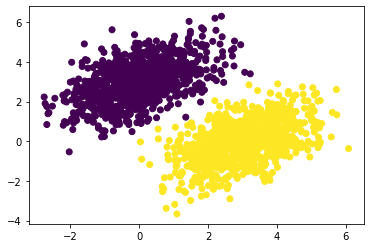

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
input_dim = 2 #the inputs will be 2d points
output_dim = 1 #the output predictions will be a single score per sample
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) #W= [W1,W2]^-1
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))  

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b  #[W1,W2]^-1 *(x,y) +b

#prediction = w1*x + w2*y + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

#reduce_mean : average these per-sample loss scores into a single scalar loss value


**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.4936
Loss at step 1: 0.0854
Loss at step 2: 0.0689
Loss at step 3: 0.0636
Loss at step 4: 0.0600
Loss at step 5: 0.0569
Loss at step 6: 0.0541
Loss at step 7: 0.0515
Loss at step 8: 0.0491
Loss at step 9: 0.0470
Loss at step 10: 0.0450
Loss at step 11: 0.0433
Loss at step 12: 0.0416
Loss at step 13: 0.0401
Loss at step 14: 0.0388
Loss at step 15: 0.0375
Loss at step 16: 0.0364
Loss at step 17: 0.0353
Loss at step 18: 0.0344
Loss at step 19: 0.0335
Loss at step 20: 0.0327
Loss at step 21: 0.0320
Loss at step 22: 0.0313
Loss at step 23: 0.0307
Loss at step 24: 0.0302
Loss at step 25: 0.0297
Loss at step 26: 0.0292
Loss at step 27: 0.0288
Loss at step 28: 0.0284
Loss at step 29: 0.0281
Loss at step 30: 0.0278
Loss at step 31: 0.0275
Loss at step 32: 0.0272
Loss at step 33: 0.0269
Loss at step 34: 0.0267
Loss at step 35: 0.0265
Loss at step 36: 0.0263
Loss at step 37: 0.0262
Loss at step 38: 0.0260
Loss at step 39: 0.0259


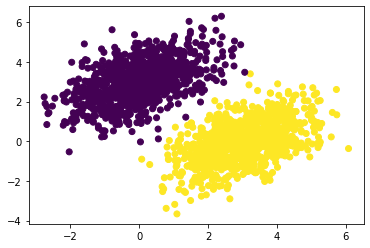

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

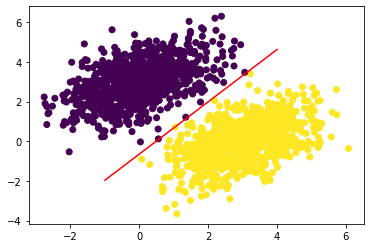

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

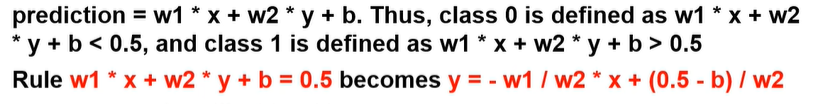

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras



**A `Dense` layer implemented as a `Layer` subclass**

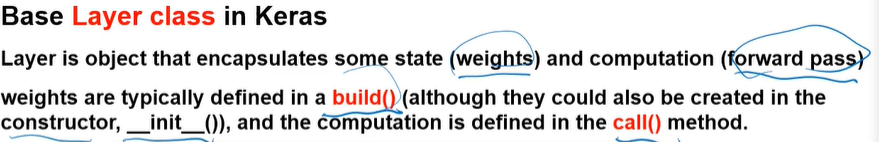

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer): 

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),    #input_dim :a, self.units= b, W =a by b matrix
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,), # b : 1 by b matrix
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
#base layer class in keras
# onnce instantiated, a later like this can be used just like a function,
# taking as input a tensorflow tensor.

my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

NameError: ignored

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

NameError: ignored

In [ ]:
model = NaiveSequential([
                         ~



])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

NameError: ignored

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

## Summary